# Session 10: Simulation Modeling II

In this session, we combine algorithmic thinking (first 5 sessions) with probability (last 4 sessions) to illustrate what a complete simulation analysis looks like.

# Case 10: Pricing Two Substitutable Products 

## Part I: Sampling Customer Valuations

A firm sells two styles of headphones, which we refer to as Model 0 and Model 1. Based on a clustering analysis using historic data, the firm estimates that customers will come from three segments (A, B or C), and the valuation (maximum willingness to pay) of customers for the two products can be modelled as normally distributed according to the following parameters. 

|Segment | $\mu_0$ | $\sigma_0$ | $\mu_1$ | $\sigma_1$ | Probability of Segment |
|--|--|--|--|--|--|
|A | 30 | 30 | 70 | 30 | 0.1 |
|B | 80 | 20 | 20 | 10 | 0.3 |
|C | -10 | 20 | -10 | 20 |0.6 |

As in the above table, a randomly chosen customer will be from segment A with 10\% probability, segment B with 30\% probability and segment C with 60\% probability. Segment A customers have high valuations for model 1, while segment B customers have high valuations for model 0. Segment C customers, which make up the majority, do not on average value either products. 

**Generate a pandas DataFrame called "valuations" representing the simulated valuations of 10,000 randomly chosen customers. Each row represents a customer. There are three columns:**

- **segment**: The segment of the customer, being "A", "B" or "C".
- **product_0**: The customer's maximum willingness to pay for Model 0.
- **product_1**: The customer's maximum willingness to pay for Model 1.

In [1]:
# Sample code for generating DataFrame
data=[[3,2,1],[5,6,7]]
import pandas as pd
pd.DataFrame(data,columns=['A','B','C'])

,A,B,C
0,3,2,1
1,5,6,7


Once you have completed this part, you should be able to run the following code and obtain similar outputs.

In [3]:
valuations.head()

,segment,product_0,product_1
0,C,-1.139081,-20.163528
1,C,-9.411392,-10.416227
2,C,-22.082534,-23.561772
3,C,22.198945,-24.888582
4,C,-41.443531,-22.556809


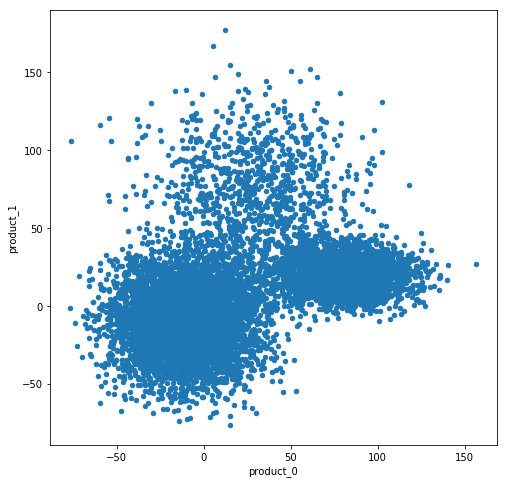

In [22]:
valuations.plot(x='product_0',y='product_1',kind='scatter',figsize=(8,8))

## Part II: Demand Estimation under Given Prices

The goal of this part is to analyze the above simulated data using the demand estimation logic from session 5. The following code is copy/pasted from the posted solution to Case 8 in session 5. We want a version of this that as input a DataFrame of the format in Part I, instead of a list of lists as in `values`. 

In [5]:
def demand(priceVector, values):
    count=[0,0]
    for curVal in values:
        diff0=curVal[0]-priceVector[0]
        diff1=curVal[1]-priceVector[1]
        if diff0<0 and diff1<0:
            continue
        elif diff0>=diff1:
            count[0]+=1
        else:
            count[1]+=1
    return count
    
values=[[25,15],[18,18],[30,20],[30,30]]
priceVector=[25,20]
demand(priceVector,values)

[2, 1]

To do this, we can create a function `demand2` that calls `demand` after extracting the numerical data from the DataFrame. 

In [6]:
valuations.iloc[:3]

,segment,product_0,product_1
0,C,-1.139081,-20.163528
1,C,-9.411392,-10.416227
2,C,-22.082534,-23.561772


In [7]:
valuations.iloc[:3,1:]

,product_0,product_1
0,-1.139081,-20.163528
1,-9.411392,-10.416227
2,-22.082534,-23.561772


In [8]:
# Extracting the numerical data using DataFrame.values
valuations.iloc[:3,1:].values

array([[ -1.13908095, -20.16352838],
       [ -9.41139157, -10.41622666],
       [-22.08253411, -23.56177185]])

In [9]:
def demand2(priceVector,valuations):
    values=valuations.iloc[:,1:].values
    return demand(priceVector,values)
demand2([25,20],valuations)

[3303, 1318]

The following code is an alternative that rewrites the logic from scratch using Pandas vectorized functions directly.

In [10]:
import numpy as np
def demand3(priceVector,df):
    diff=df[['product_0','product_1']]-priceVector
    demand0=((diff['product_0']>=diff['product_1'])&(diff['product_0']>=0)).sum()
    demand1=((diff['product_0']<diff['product_1'])&(diff['product_1']>=0)).sum()    
    return [demand0,demand1]
demand3([25,20],valuations)

[3303, 1318]

In [11]:
%timeit demand2([25,20],valuations)

13.2 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%timeit demand3([25,20],valuations)

2.23 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Part III. Optimization

### A. Brute Force Search of Optimal Price Vector

Search through all combinations of prices $(p_0,p_1)$, where $p_0$ and $p_1$ are taken from from `range(0,200,5)`, which is equivalent to the list `[0,5,10,...,195]`. Identify the revene maximizing combination of prices and the estimated revenue. 

Best combination is p0=60, p1=60, with revenue=$194160.


### B. Responding to Competitor Pricing

Suppose now that Model 0 is sold by a competitor, and only revenue from Model 1 counts. Find the optimal price to charge if the competitor prices Model 0 at $80. (Optional: plot a graph of what is the best price for Model 1 given any price for Model 0, as well as the resultant revenue.)

Best response to p0=80 is p1=20, with revenue=$48100.


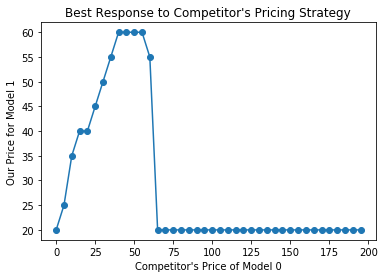

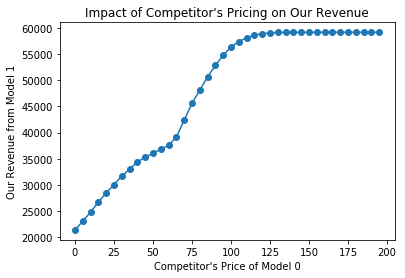

### C. Benefit of Price Discrimination

Suppose that the company can observe which segment each customer belongs to, and charge separate prices to each segment. What would be the optimal prices for each segment and what would be the additional revenue from this flexibility?

**Hint:** Filter the "valuations" DataFrame by whether the segment is A, B or C, and plug in the filtered DataFrames to the previous analysis. The following code shows one way to filter DataFrames:

```python
valuations.query('segment=="A"')
```

Segment A:
Best combination is p0=45, p1=60, with revenue=$42945.


Segment B:
Best combination is p0=60, p1=30, with revenue=$153540.


Segment C:
Best combination is p0=15, p1=15, with revenue=$18180.


Potential benefit of price discrimination is $20505.
